In [ ]:
##EDA/Visualizations

In [2]:
import pandas as pd

In [8]:
##Uploading the datasets
df = pd.read_csv('training_vis')

In [154]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844795 entries, 0 to 844794
Data columns (total 52 columns):
Unnamed: 0                    844795 non-null int64
id                            844795 non-null int64
loan_amnt                     844795 non-null float64
funded_amnt                   844795 non-null float64
funded_amnt_inv               844795 non-null float64
term                          844795 non-null int64
int_rate                      844795 non-null float64
installment                   844795 non-null float64
grade                         844795 non-null object
sub_grade                     844795 non-null object
emp_length                    844795 non-null int64
home_ownership                844795 non-null object
annual_inc                    844795 non-null float64
verification_status           844795 non-null object
issue_d                       844795 non-null int64
loan_status                   844795 non-null object
pymnt_plan                    844795 non

In [29]:
df_grouped_state = df.groupby(['addr_state']).mean()

In [30]:
df_grouped_state.head(5)

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
addr_state,,,,,,,,,,,,,,,,,,,,,
AK,451141.842378,3.080521e+07,16926.592732,16926.592732,16917.749954,42.999528,13.671402,511.596041,6.308636,76932.941977,...,2015.419066,2564.294903,2016.0,2015.772062,0.010854,1.0,0.001416,182.880604,166629.431807,30935.420481
AL,466276.735791,3.416529e+07,14858.401773,14857.237517,14850.099859,44.377042,13.838387,434.367820,6.655903,68769.649857,...,2015.456556,2032.413429,2016.0,2015.809893,0.019599,1.0,0.005413,183.889407,144246.151283,28954.708166
AR,460347.226995,3.415789e+07,14220.026650,14220.026650,14214.560847,43.535977,13.527929,418.974955,6.441762,66058.944634,...,2015.478288,1820.054400,2016.0,2015.813137,0.015676,1.0,0.005957,144.722997,134299.449130,28161.797147
AZ,464602.645549,3.420497e+07,14372.323904,14371.886231,14364.997414,42.906253,13.169181,426.517710,5.913235,71826.804690,...,2015.423811,2196.661937,2016.0,2015.788736,0.015197,1.0,0.004569,248.694784,150007.695554,30561.163210
CA,453102.660245,3.273122e+07,14860.961345,14860.359685,14853.071708,42.201558,13.219207,447.628065,6.079817,79724.914120,...,2015.397636,2460.923001,2016.0,2015.761384,0.011648,1.0,0.004284,224.297783,150996.622949,32170.723269


In [143]:
df_grouped_state.columns

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'issue_d', 'zip_code', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [131]:
## Sorting the dataframe by interest rate
df_grouped_state_sorted = df_grouped_state.sort_values(by='int_rate', ascending=False)

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Interest Rate by State')

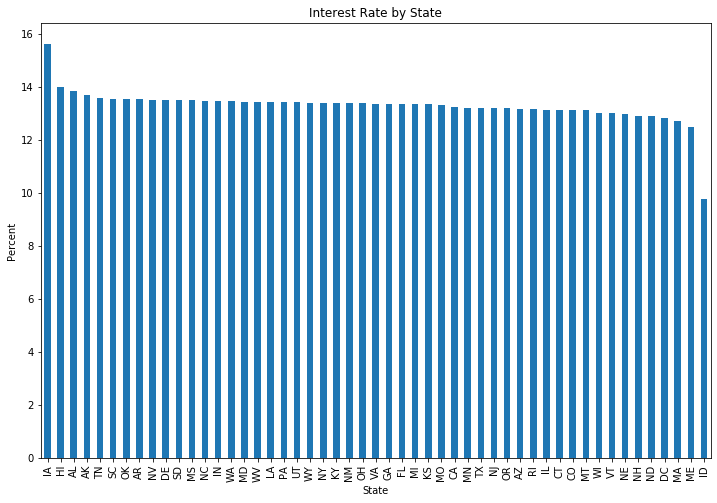

In [140]:
## bar plot of the interest rate for each state (high to low)
df_grouped_state_sorted['int_rate'].plot(kind='bar', figsize=(12, 8))
plt.xlabel('State')
plt.ylabel('Percent')
plt.title('Interest Rate by State')

In [148]:
## Sorting the dataframe by employment length
df_grouped_state_sorted_emp = df_grouped_state.sort_values(by='emp_length', ascending=False)

Text(0.5, 1.0, 'Employment Length by State')

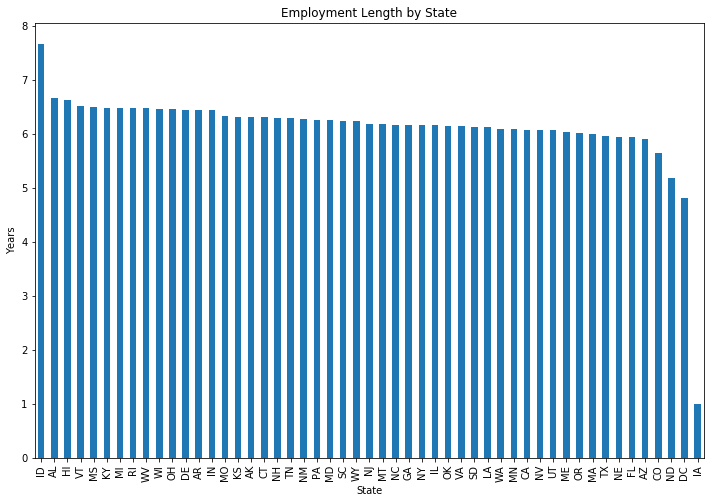

In [151]:
## bar plot of the employment length for each state (high to low)
df_grouped_state_sorted_emp['emp_length'].plot(kind='bar', figsize=(12, 8))
plt.xlabel('State')
plt.ylabel('Years')
plt.title('Employment Length by State')

In [152]:
## Sorting the dataframe by annual_inc
df_grouped_state_sorted_annual_inc = df_grouped_state.sort_values(by='annual_inc', ascending=False)

Text(0.5, 1.0, 'Annual Income by State')

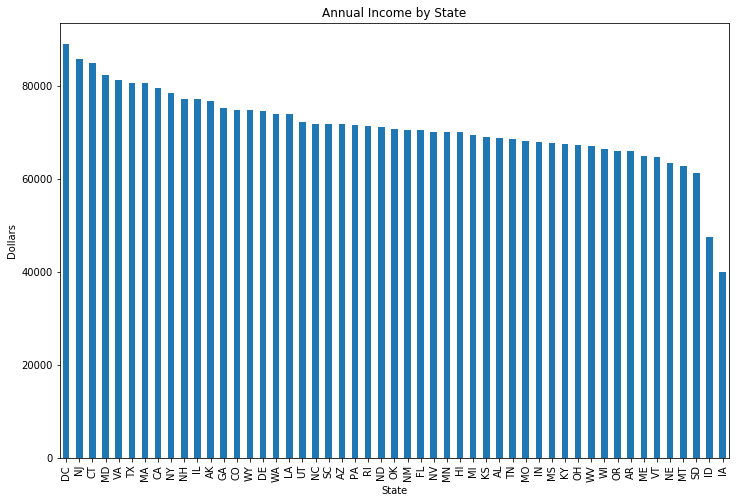

In [153]:
## bar plot of the annual_inc for each state (high to low)
df_grouped_state_sorted_annual_inc['annual_inc'].plot(kind='bar', figsize=(12, 8))
plt.xlabel('State')
plt.ylabel('Dollars')
plt.title('Annual Income by State')

In [36]:
## Determining which states have the highest and lowest interest rates
df_grouped_state_min = [df_grouped_state['int_rate'] == df_grouped_state['int_rate'].min()]
df_grouped_state_max = [df_grouped_state['int_rate'] == df_grouped_state['int_rate'].max()]

In [46]:
my_list = ['ID', 'IA']
df_filter  = df_grouped_state[df_grouped_state.index.isin(my_list)]

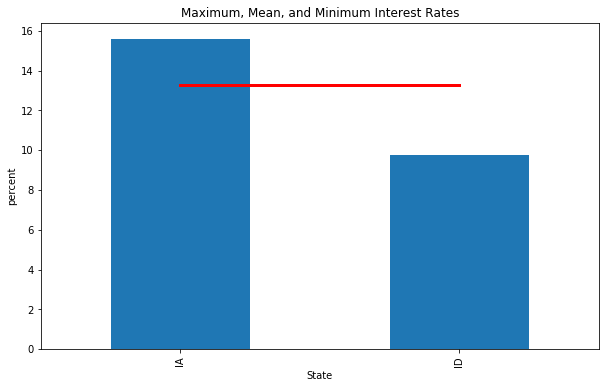

In [141]:
## Bar and line plots of the maximum, mean, and minimum interest rates for each state
df_filter['int_rate'].plot(kind='bar', figsize=(10,6))
plt.xlabel('State')
plt.ylabel('percent')
plt.title('Maximum, Mean, and Minimum Interest Rates')

x = ['IA', 'ID']
mean = df_grouped_state['int_rate'].mean()
y = [mean, mean]
plt.plot(x, y)

plt.plot(x, y, color='red', markersize=30, linestyle='-', linewidth=3)